In [3]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models  
import matplotlib.pyplot as plt
import numpy as np
(xtrain , ytrain), (xtest , ytest) =datasets.fashion_mnist.load_data()

In [4]:
print("xtrain shape :",xtrain.shape)
print("ytrain shape :",ytrain.shape)
print("xtest shape :",xtest.shape)
print("ytest shape :",ytest.shape)

xtrain shape : (60000, 28, 28)
ytrain shape : (60000,)
xtest shape : (10000, 28, 28)
ytest shape : (10000,)


In [5]:
classes = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]


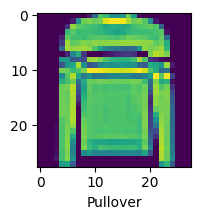

In [6]:
def image_show(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])
image_show(xtrain,ytrain , 5)

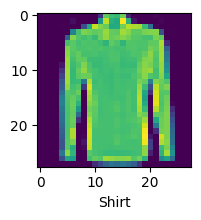

In [7]:
image_show(xtrain,ytrain , 40)


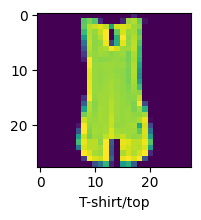

In [8]:
image_show(xtrain,ytrain , 4)


In [9]:
xtrain = xtrain / 255.0
xtest = xtest / 255.0

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 12ms/step - accuracy: 0.7736 - loss: 0.6284
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/step - accuracy: 0.8874 - loss: 0.3072
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/step - accuracy: 0.9016 - loss: 0.2634
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accuracy: 0.9136 - loss: 0.2318
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 0.9242 - loss: 0.2025
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 0.9331 - loss: 0.1816
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 0.9395 - loss: 0.1636
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 0.9453 - loss: 0.1477
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 0.9494 - loss: 0.1364
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 0.9552 - loss: 0.1187
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9024 - loss: 0.3127
313/313 ━━━━━━━━━━━━━━━━

'Coat'

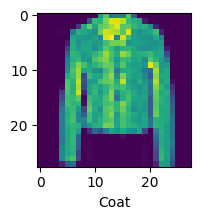

In [11]:
#cnn.evaluate(xtest, ytest): Modelu se prosleđuju test podaci (xtest) i odgovarajuće ciljne vrednosti (ytest).
#Model izračunava gubitak i tačnost na test podacima pomoću metrike koja je definisana prilikom kompajliranja modela (u ovom slučaju, koristi se sparse_categorical_crossentropy kao gubitak i accuracy kao metrika).
#Vraća rezultate evaluacije.

#ypred = cnn.predict(xtest): Model koristi funkciju predict kako bi dobijao predviđanja na osnovu test podataka (xtest).
#Rezultat su verovatnoće pripadanja svakoj od 10 klasa za svaki testni podatak.
#yclasses = [np.argmax(element) for element in ypred]:

#Za svaki testni podatak, određuje se klasa koja ima najveću verovatnoću (najveću vrednost) od dobijenih verovatnoća.
#Ove predviđene klase se čuvaju u listi yclasses.
#image_show(xtest, ytest, 10):

#Funkcija image_show je definisana ranije i koristi se za prikazivanje slike na osnovu indeksa. U ovom slučaju, prikazuje se 10-ta slika iz testnog skupa, zajedno sa stvarnom klasom kojoj ta slika pripada.classes[yclasses[10]]:

#Na osnovu predviđene klase za 10-tu sliku (yclasses[10]), dobijamo odgovarajući tekstualni opis klase iz liste classes. Ovaj tekstualni opis se potom koristi za prikazivanje stvarne klase slike.

from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
#build cnn
cnn = models.Sequential([ 
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
cnn.fit(xtrain, ytrain, epochs=10)
cnn.evaluate(xtest,ytest)

ypred = cnn.predict(xtest)
yclasses = [np.argmax(element) for element in ypred]
yclasses[:10]
ytest[:10]
#predict 
image_show(xtest, ytest,10)
classes[yclasses[10]]

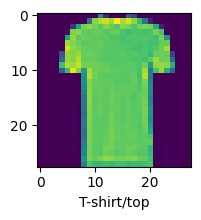

In [14]:
image_show(xtest, ytest,88)
